In [1]:
import numpy as np
import skimage.io as ski
import matplotlib.pyplot as plt
%matplotlib inline
# from skimage.viewer import ImageViewer

In [2]:
test_image1 = ski.imread("testout1.png")

test_image2 = ski.imread("testmap1.png")

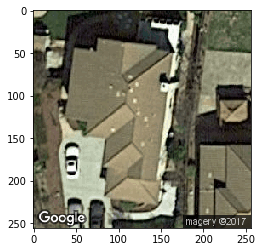

In [3]:
plt.imshow(test_image2)

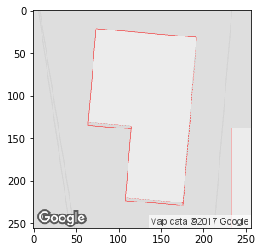

In [4]:
plt.imshow(test_image1)

In [5]:
a = np.empty_like (test_image1)
a[:] = test_image1

In [6]:
for i in range(256):
    for j in range(256):
        if(a[i][j][0] != 236 and a[i][j][1] != 236 and a[i][j][2] != 236):
            a[i][j][0] = 0
            a[i][j][1] = 0
            a[i][j][2] = 0
        else:
            a[i][j][0] = 255
            a[i][j][1] = 255
            a[i][j][2] = 255

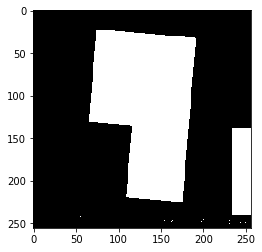

In [7]:
plt.imshow(a)

In [8]:
final_image = a.astype(np.uint8)

In [9]:
import skimage.color as skc

In [10]:
grey_image = skc.rgb2gray(final_image)

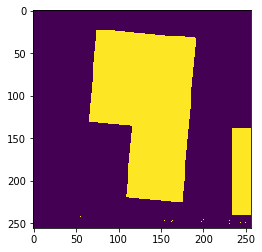

In [11]:
plt.imshow(grey_image)

In [12]:
fgi = (grey_image*255).astype(np.uint8)

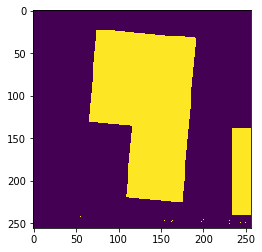

In [13]:
plt.imshow(fgi)

In [15]:
from skimage.feature import canny
edges = canny(fgi)

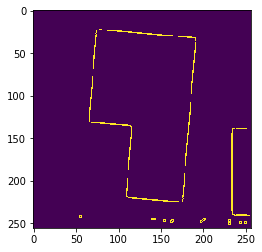

In [16]:
plt.imshow(edges)

In [17]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

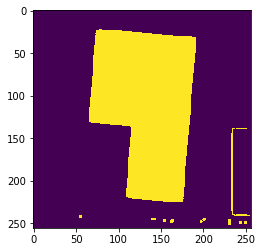

In [18]:
plt.imshow(fill_coins)

In [23]:
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

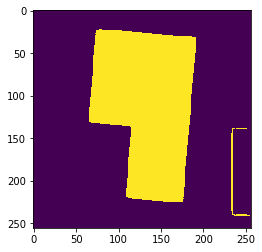

In [22]:
plt.imshow(coins_cleaned)

In [28]:
coins_cleaned

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [26]:
copy_main = np.empty_like (test_image2)
copy_main[:] = test_image2

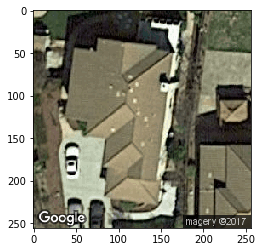

In [29]:
plt.imshow(copy_main)

In [31]:
for i in range(256):
    for j in range(256):
        if(not(coins_cleaned[i][j])):
            copy_main[i][j][0] = 0
            copy_main[i][j][1] = 0
            copy_main[i][j][2] = 0

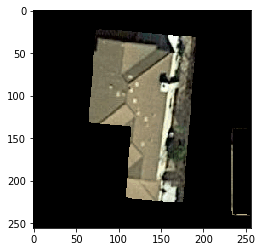

In [32]:
plt.imshow(copy_main)